<a href="https://www.kaggle.com/code/haticerumeysayan/titanic?scriptVersionId=153216073" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check for missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Fill in missing data in Age column with average
train['Age'].fillna(train['Age'].mean(), inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

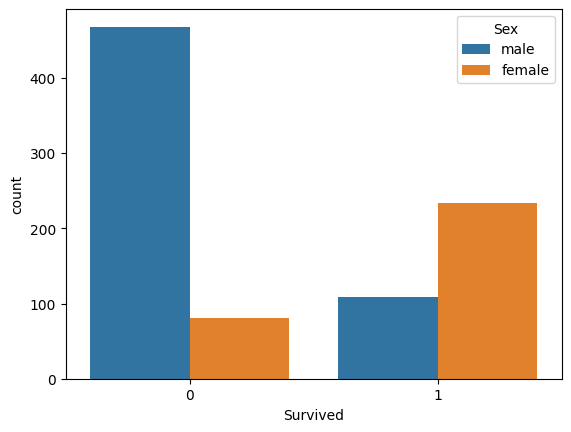

In [6]:
 # Gender distribution of survivors
sns.countplot(x='Survived', hue='Sex', data=train)
plt.show

**0:** Represents those who did not survive (those who died)

**1:** Represents survivors.


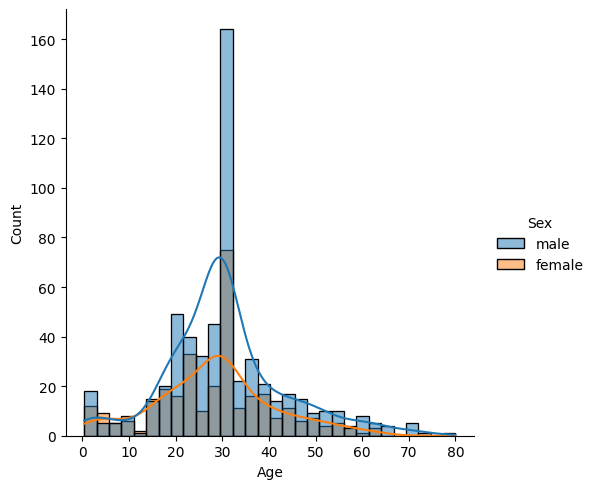

In [7]:
# A scatter plot showing the distribution of the age column by gender
sns.displot(data=train, x='Age', hue='Sex', kde=True)
plt.show()

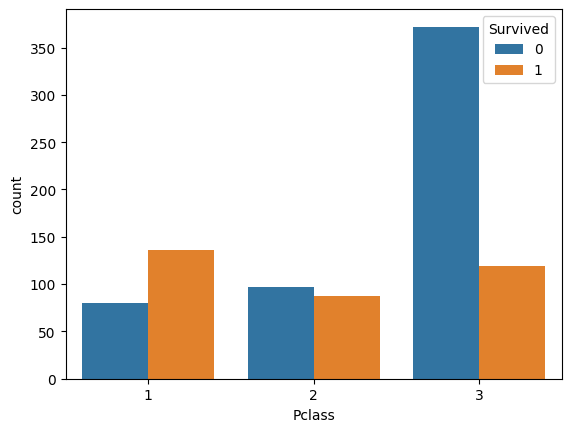

In [8]:
# Relationship between Pclass and survivors
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

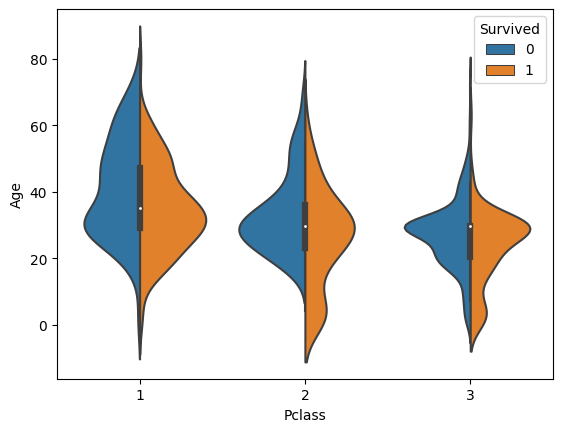

In [9]:
sns.violinplot(data=train, x='Pclass', y='Age', hue='Survived', split=True)
plt.show()


In [10]:
# family size
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [11]:
# Specifying properties and target variable
X = train[['Pclass', 'Sex', 'Age', 'FamilySize']]
y = train['Survived']

# Digitizing categorical data
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# TMaking predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.8212290502793296


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[91 14]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [13]:
# Unique values in Family Size column
unique_family_sizes = train['FamilySize'].unique()
print(unique_family_sizes)

[ 2  1  5  3  7  6  4  8 11]


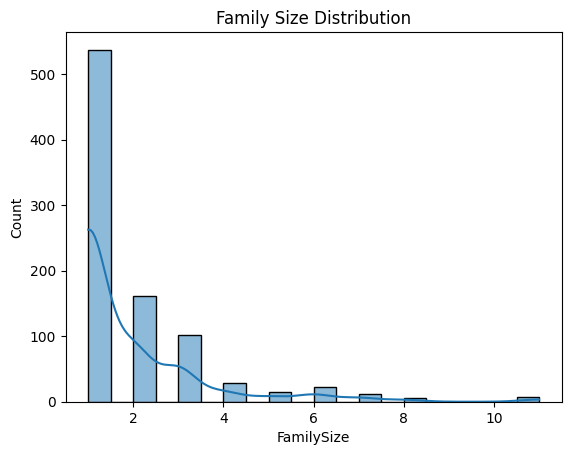

In [14]:
#Visualize the distribution of the Family Size property 
sns.histplot(train['FamilySize'], bins=20, kde=True)
plt.title('Family Size Distribution')
plt.show()


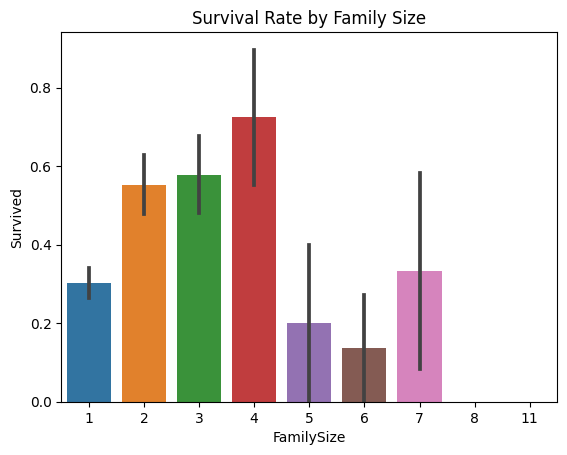

In [15]:
# Survival Rate with Family Size
sns.barplot(x='FamilySize', y='Survived', data=train)
plt.title('Survival Rate by Family Size')
plt.show()

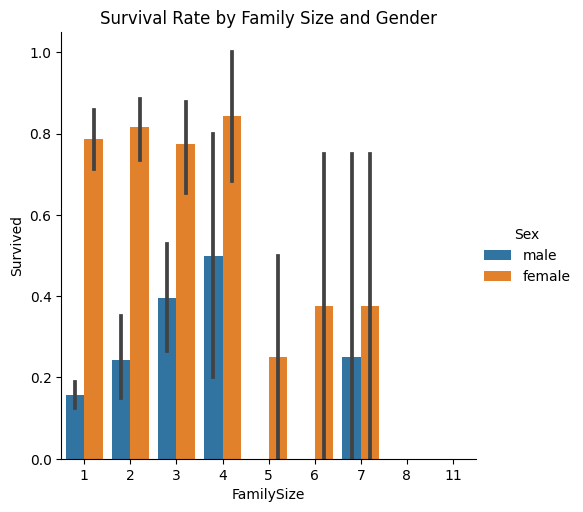

In [17]:
# Survival rates by gender and FamilySize
sns.catplot(x='FamilySize', y='Survived', hue='Sex', data=train, kind='bar')
plt.title('Survival Rate by Family Size and Gender')
plt.show()
